In [1]:
##차원 축소의 또 다른 방식 => 특성 추출

##데이터셋의 정보를 요약하는 세 가지 기술
    #1. 주성분 분석을 이용한 비지도 데이터 압축하기
    #2. 선형 판별 분석을 이용하여 클래스 구별 능력 최대화 하기
    #3. 커널 PCA를 사용한 비선형 차원 축소하기

In [2]:
####주성분 분석(Principle Component Analysis, PCA)####
##특성 추출은 새로운 공간으로 데이터를 변형하거나 투영한다. (특성 선택은 원본 특성을 유지)
    #저장 공간 절약, 학습 알고리즘의 계산 효율성 향상, 차원의 저주 문제 감소를 통한 예측 성능 향상

In [2]:
#####PCA####
##특성 사이의 상관 관계를 기반으로 데이터의 특성을 잡아낼 수 있다.
##PCA를 사용할 단계
#1. d차원 데이터셋을 표준화한다
#2. 공분산 행렬을 만든다
#3. 공분산 행렬을 고유 벡터와 고유값으로 분해한다
#4. 고윳값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매긴다
#5. 고윳값이 가장 큰 k(새로운 특성 부분 공간의 차원)개의 고유 벡터를 선택한다.
#6. 최상위 k개의 고유 벡터로 투영 행렬 W를 만든다
#7. 투영 행렬 W를 사용해 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환한다. 

In [8]:
##주성분 추출 단계
#위의 단계 중 1~4번 수행

#wine 데이터 셋 로드
import pandas as pd
df_wine = pd.read_csv(r'E:\Programming\python\ML\data\wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
#70% 훈련 30%테스트
from sklearn.model_selection import train_test_split

X,y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

#특성을 표준화 전처리한다. (1번단계)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [9]:
##공분산 행렬 구성하기
#d x d 차원의 대칭 행렬로 특성 상호 간의 공분산을 저장
#d는 데이터셋에 있는 차원 개수
#wine 데이터셋의 차원은 13이므로 공분산 행렬은 13 x 13이된다.

In [10]:
##공분산 행렬의 고유 벡터와 고유값의 쌍 구하기
#numpy의 linalg.eig 함수 사용
import numpy as np

cov_mat = np.cov(X_train_std.T) #표준화 전처리된 훈련 데이터셋의 공분산 행렬을 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) #고윳값 분해 수행 => eigen_vals는 벡터, eigen_vecs는 행렬
print('\n고유값 \n%s' %eigen_vals)


고유값 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


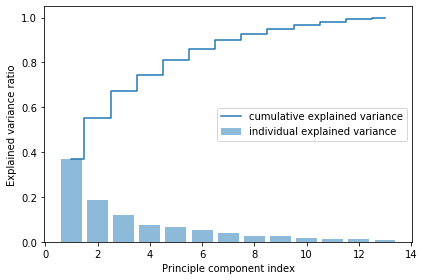

In [12]:
#데이터셋 차원을 새로운 특성 부분 공간으로 압축해서 줄여야 하기 떄문에 가장 많은 정보(분산)을 가진 고유 벡터 일부만 선택(최상위 k개의 고유 벡터 선택)
#고유값의 설명된 분산 비율 그래프 그리기
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principle component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [14]:
##남은 3 단계 진행하기

In [15]:
#투영 행렬 W 구성하기

#(고유값, 고유 벡터) 튜플 리스트 만들기
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

#높은 값에서 낮은 값으로 튜플쌍을 정렬한다
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [17]:
#가장 큰 두개의 고윳값에 해당하는 고유 벡터를 선택
#주성분의 개수는 계산 효율성과 모뎅 성능 사이의 절충점을 찾아서 결정해야함
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬:\n', w) #13 x 2차원의 투영 행렬 W 생성

투영 행렬:
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [18]:
#샘플을 PCA부분 공간으 투영하여 두 개의 특성으로 구성된 2차원 샘플 벡터 얻기

X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [23]:
#전체(124 x 13) 차원의 훈련 데이터셋을 행렬 점곱으로 두 개으 주성분으로 변환 가능

X_train_pca = X_train_std.dot(w)

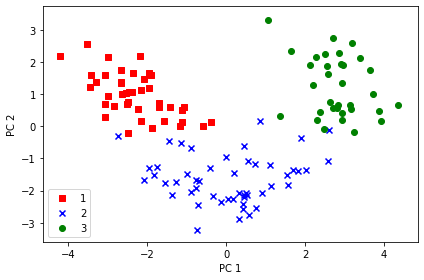

In [25]:
#2차 산점도로 시각화 하기
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show() #y축보다 x축을 따라 더 넓게 분포(선형분류기가 처리하기 용이)

In [26]:
####사이킷런에 구현된 PCA 사용하기####

In [33]:
#PCA를 사용해서 wine 데이터셋의 훈련 세트를 적용하고 로지스틱 회귀로 변환된 샘플 데이터 분류하기
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    #마커와 컬러맵 준비
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    #결정 경계 그리기
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #클래스 샘플을 표시합니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.6,
                    c=cmap.colors[idx],
                    edgecolors='black',
                    marker=markers[idx],
                    label=cl)

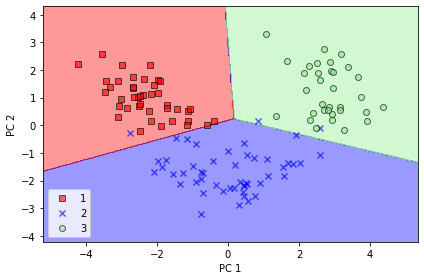

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

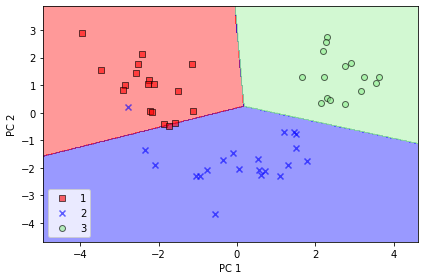

In [35]:
#테스트 세트를 변환 후 로지스틱 회귀가 클래스를 잘 구분하는지 결정 경계 그리기
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

In [37]:
##전체 주성분의 설명된 분산 비율 알기
pca = PCA(n_components=None) #분산 크기 순서대로 모든 주성분이 반환됨
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [38]:
####선형 판별 분석(Linear Discrimeinant Analyis, LDA)####

In [ ]:
#규제가 없는 모델에서 차원의 저주로 인한 고대 적합 정도를 줄이고 계산 효율성 높이기 위한 특성 추출 기법
